## Simple Linear Regression

Suppose we have data $(X_1,Y_1),(X_2,Y_2),\dots,(X_n,Y_n)$. We want to use a linear model to describe the relationship between $X$ and $Y$.

Assume the linear model as follow:

1.$X$ is arbitrary, it means $X$ can be fixed or random.

2.$Y=\beta_{0}+\beta_{1}X+\epsilon$.

3.$\mathbb{E}[\epsilon\mid X = x]=0$, $\mathbb{V}[\epsilon\mid X=x]=\sigma^2$ for all $x$.

4.$\epsilon$ is independent across observations.

Denote regression function $m(X)=\beta_{0}+\beta_{1}X$. To measure the quality of regression function, we use **Mean squared error** $MSE(\beta_{0},\beta_{1})$. And

$$MSE(\beta_{0},\beta_{1})= \mathbb{E}[(Y-(\beta_{0}+\beta_{1}X))^2]$$

To obtain the optimal estimation, we need to minimize $MSE$.

$$\frac{\partial\mathbb{E}[(Y-(\beta_{0}+\beta_{1}X))^2]}{\partial \beta_{0}}=2(-\mathbb{E}[Y]+\beta_{0} + \beta_{1}\mathbb{E}[X])$$

$$\frac{\partial\mathbb{E}[(Y-(\beta_{0}+\beta_{1}X))^2]}{\partial \beta_{1}}=2\big(-\text{Cov}[X,Y]-\mathbb{E}[X]\mathbb{E}[Y]+\beta_{0}\mathbb{E}[X]+\beta_{1}\mathbb{V}[X]+\beta_{1}(\mathbb{E}[X])^2\big)$$

Set the derivative to zero,

$$\hat{\beta_{1}}=\frac{\text{Cov}[X,Y]}{\mathbb{V}[X]}$$

$$\hat{\beta_{0}}=\mathbb{E}[Y]-\hat{\beta_{1}}\mathbb{E}[X]$$

Return to our scenario:

\begin{align*}
\hat{\beta_{1}}&=\frac{\text{Cov}[X,Y]}{\mathbb{V}[X]}\\
&=\frac{\frac{1}{n}\sum_iX_iY_i-\bar{X}\bar{Y}}{s_X^2}\\
&=\frac{\frac{1}{n}\sum_iX_i(\beta_{0}+\beta_{1}X_i+\epsilon_i)-\bar{X}(\beta_{0}+\beta_{1}X_i+\epsilon_i)}{s_X^2}\\
&=\frac{1}{nS_X^2}\sum_i(\beta_{0}X_i+\beta_{1}X_i^2+X_i\epsilon_i-\beta_{0}\bar{X}-\beta_{1}X_i\hat{X}-\bar{X}\epsilon_i)\\
&=\frac{1}{s_X^2}\big[[\beta_{1}(\frac{1}{n}\sum_iX_i^2-(\sum_iX_i)^2)]+\frac{1}{n}\sum_i(X_i-\bar{X})\epsilon_i\big]\\
&=\beta_{1}+\sum_i\frac{X_i-\bar{X}}{nS_X^2}\epsilon_i
\end{align*}

Note the sample variance $S_X^2=\frac{1}{n}\sum_i(X_i-\bar{X})^2$.

\begin{align*}
\hat{\beta_{0}}&=\mathbb{E}[Y]-\hat{\beta_{1}}\mathbb{E}[X]\\
&=\frac{1}{n}\sum_i(\beta_{0}+\beta_{1}X_i+\epsilon_i)-\hat{\beta_{1}}\bar{X}\\
&=\beta_{0}+\beta_{1}\bar{X}+\frac{1}{n}\sum_i\epsilon_i-\beta_{1}\bar{X}-\bar{X}\sum_i\frac{X_i -\bar{X}}{nS_X^2}\epsilon_i\\
&=\beta_{0}+\sum_i[\frac{1}{n}-\frac{\bar{X}(X_i-\bar{X})}{nS_X^2}]\epsilon_i
\end{align*}

As for the estimation of regression function $\hat{m}(X)$,

\begin{align*}
\hat{m}(X)&=\hat{\beta_{0}}+\hat{\beta_{1}}X\\
&=\beta_{0}+\beta_{1}X+\sum_i\big(\frac{1}{n}+(X-\bar{X})\frac{(X_i-\bar{X})}{nS_X^2}\big)\epsilon_i
\end{align*}

Then define the residual at $X_j$ as $e_j$, therefore

\begin{align*}
e_j&=Y_j-\hat{m}(X_j)\\
&=\beta_{0}+\beta_{1}X_j+\epsilon_j-m(X_j)-\sum_i\big(\frac{1}{n}+(X_j-\bar{X})\frac{(X_i-\bar{X})}{nS_X^2}\big)\epsilon_i\\
&=\epsilon_j-\sum_i\big(\frac{1}{n}+(X_j-\bar{X})\frac{(X_i-\bar{X})}{nS_X^2}\big)\epsilon_i\\
&=\sum_i\big(\delta_{ij}-\frac{1}{n}-(X_j-\bar{X})\frac{(X_i-\bar{X})}{nS_X^2}\big)\epsilon_i
\end{align*}



Have a look at the estimation of $\sigma^2$:

$$\hat{\sigma}^2=\frac{1}{n}\sum_je_j^2$$

Let

$$c_{ij}=\delta_{ij}-\frac{1}{n}-(X_j-\bar{X})\frac{(X_i-\bar{X})}{nS_X^2}$$

\begin{align*}
\mathbb{E}[e_j^2]&=\mathbb{E}\big[\big(\sum_ic_{ij}\epsilon_i\big)^2\big]\\
&=\mathbb{V}\big[\sum_ic_{ij}\epsilon_i\big]+\big(\mathbb{E}\big[\sum_ic_{ij}\epsilon_i\big]\big)^2\\
&=\mathbb{V}\big[\sum_ic_{ij}\epsilon_i\big]+\big(\sum_ic_{ij}\mathbb{E}\epsilon_i\big)^2\\
&=\text{Cov}\big(\sum_ic_{ij}\epsilon_i,\sum_kc_{kj}\epsilon_k\big)\\ 
&=\sum_ic_{ij}\sum_kc_{kj}\text{Cov}\big(\epsilon_i,\epsilon_k\big)\\
&=\sum_ic_{ij}^2\text{Cov}\big(\epsilon_i,\epsilon_i\big)\\
&=\sum_ic_{ij}^2\mathbb{V}[\epsilon_i]\\
&=\sigma^2\sum_ic_{ij}^2\\
&=\sigma^2\sum_i\big(\delta_{ij}-\frac{1}{n}-(X_j-\bar{X})\frac{(X_i-\bar{X})}{nS_X^2}\big)^2\\
&=\sigma^2\sum_i\big(\delta_{ij}^2-\frac{2}{n}\delta_{ij}-2\delta_{ij}(X_j-\bar{X})\frac{(X_i-\bar{X})}{nS_X^2}+\frac{1}{n^2}+\frac{2}{n}(X_j-\bar{X})\frac{(X_i-\bar{X})}{nS_X^2}+(X_j-\bar{X})^2\frac{(X_i-\bar{X})^2}{n^2S_X^4}\big)\\
&=\sigma^2\big(1-\frac{1}{n}-2\frac{(X_j-\bar{X})^2}{nS_X^2}\big)+\sigma^2\sum_i\big(\frac{2(X_i-\bar{X})(X_j-\bar{X})}{nS_X^2}+\frac{(X_i-\bar{X})^2(X_j-\bar{X})^2}{n^2S_X^4}\big)\\
&=\sigma^2\big(1-\frac{1}{n}-2\frac{(X_j-\bar{X})^2}{nS_X^2}\big)+\frac{2(X_j-\bar{X})\sigma^2}{nS_X^2}\sum_i(X_i-\bar{X})+\frac{(X_j-\bar{X})^2\sigma^2}{n^2S_X^4}\sum_i(X_i-\bar{X})^2\\
&=\sigma^2\big(1-\frac{1}{n}-2\frac{(X_j-\bar{X})^2}{nS_X^2}\big)+\frac{(X_j-\bar{X})^2\sigma^2}{nS_X^2}\\
&=\sigma^2\big(1-\frac{1}{n}-\frac{(X_j-\bar{X})^2}{nS_X^2}\big)
\end{align*}

Therefore,

\begin{align*}
\mathbb{E}[\hat{\sigma}^2]&=\mathbb{E}\big[\frac{1}{n}\sum_je_j^2\big]\\
&=\frac{1}{n}\sum_j\mathbb{E}\big[e_j^2\big]\\
&=\frac{1}{n}\sum_j\sigma^2\big(1-\frac{1}{n}-\frac{(X_j-\bar{X})^2}{nS_X^2}\big)\\
&=\sigma^2-\frac{\sigma^2}{n}-\frac{\sigma^2}{nS_X^2}\sum_j\frac{(X_j-\bar{X})^2}{n}\\
&=\frac{n-2}{n}\sigma^2
\end{align*}

Then we know 

$$\tilde{\sigma}^2=\frac{1}{n-2}\sum_je_j^2$$

is the unbiased estimator of $\sigma^2$ if the linear model assumptions hold.

Note that the residuals are related to the noise,

$$\epsilon_i=Y_i-(\beta_{0}+\beta_{1}X_i)$$

$$e_i=Y_i-(\hat{\beta_{0}}-\hat{\beta_{1}}X_i)=(\beta_{0}-\hat{\beta_{0}})+(\beta_{1}-\hat{\beta_{1}})X_i+\epsilon_i$$

In general

$$\sum_i\epsilon_i\not=0$$

while

\begin{align*}
\sum_ie_i&=\sum_iY_i-(\hat{\beta_{0}}-\hat{\beta_{1}}X_i)\\
&=\sum_iY_i-(\bar{Y}-\hat{\beta_{1}}\bar{X})-\hat{\beta_{1}}X_i\\
&=\sum_i(Y_i-\bar{Y})+\sum_i(\hat{\beta_{1}}\bar{X}-\hat{\beta_{1}}X_i)\\
&=0
\end{align*}

It means that although $\epsilon$'s are independent of each other, it does not hold for residuals. It is the same that $\sum_i\epsilon_i(X_i-\bar{X})\not=0$ while $\sum_ie_i(X_i-\bar{X})=0$.

To sum up,

1.The residuals should have expectation zero conditional on $X$. And the sample mean of $e_i$ is exactly $0$.

2.The residuals show a constant variance, unchanging with $X$.

3.The residuals are correlated, but the correlation is extremely weak.

## Gaussian-noise Simple Linear Regression

Above results derived from current assumptions give us information about the expectation and variance of the estimations, however, it can not tell us the distribution or confidence interval of them. To get stronger conclusion, we need stronger assumption.

Here is the Gaussian-noise simple linear regression model:

1.The distribution of $X$ is arbitrary, it means $X$ can be fixed or random.

2.$Y=\beta_{0}+\beta_{1}X+\epsilon$.

3.$\epsilon\sim\mathcal{N}(0,\sigma^2)$, and is independent of $X$.

4.$\epsilon$ is independent across observations.

Having these assumptions, we are able to use the method of maximum likelihood(same as LSE), we obtain

$$\hat{\beta_1}=\frac{c_{XY}}{S_X^2}=\beta_{1}+\sum_i\frac{X_i-\bar{X}}{nS_X^2}\epsilon_i$$

$$\hat{\beta_0}=\bar{Y}-\hat{\beta_1}\bar{X}=\beta_{0}+\sum_i[\frac{1}{n}-\frac{\bar{X}(X_i-\bar{X})}{nS_X^2}]\epsilon_i$$

$$\hat{\sigma}^2=\frac{1}{n}\sum_i(Y_i-(\hat{\beta_0}+\hat{\beta_1}X_i))^2$$

From the normal assumption:

$$\hat{\beta_1}\sim\mathcal{N}(\beta_1,\frac{\sigma^2}{nS_X^2})$$

$$\hat{m}(X)\sim\mathcal{N}\big(\beta_0+\beta_1X,\frac{\sigma^2}{n}(1+\frac{X-\bar{X}}{S_X^2})\big)$$

For the statistical inference, we have

$$\frac{\hat{\beta_1}-\beta_1}{\sigma \big/\sqrt{nS_X^2}}\sim\mathcal{N}(0,1)$$

And by the same method

$$\frac{\hat{\beta_0}-\beta_0}{\sqrt{\frac{\sigma^2}{n}\big(1+\frac{\bar{X}^2}{S_X^2}\big)}}\sim\mathcal{N}(0,1)$$

We have shown that

$$\mathbb{E}[\hat{\sigma}^2]=\frac{n-2}{n}\sigma^2$$

Adding on normal assumption

$$\frac{n\hat{\sigma}^2}{\sigma^2}\sim\chi_{n-2}^2$$

If we have prior $\sigma$, it is easy to compute $\text{se}[\hat{\beta_1}]$ and $\text{se}[\hat{\beta_0}]$. We can claim that with probability $1-\alpha$,

$$\beta_1\in \big[\hat{\beta_1}-\text{se}[\hat{\beta_1}]z_{\alpha/2},\hat{\beta_1}-\text{se}[\hat{\beta_1}]z_{1-\alpha/2}\big]$$

$$\beta_0\in \big[\hat{\beta_0}-\text{se}[\hat{\beta_0}]z_{\alpha/2},\hat{\beta_0}-\text{se}[\hat{\beta_0}]z_{1-\alpha/2}\big]$$

Unfortunately, the value of $\sigma$ is unknown, so we can not calculate the left hand. Then we come up with the estimation of $\text{se}[\hat{\beta_1}]$ and $\text{se}[\hat{\beta_0}]$, which is called **estimation of standard deviation**. Where

$$\hat{\text{se}}[\hat{\beta_1}]=\frac{\sigma}{S_X\sqrt{n-2}} $$

$$\hat{\text{se}}[\hat{\beta_0}]=\frac{\sigma}{S_X\sqrt{n-2}}\sqrt{S_X^2+\bar{X}^2}$$

and $n-2$ is the de-biased version. So what about the sampling distribution of $\frac{\hat{\beta}-\beta}{\hat{\text{se}}[\hat{\beta}]}$?

\begin{proposition}

If $Z\sim\mathcal{N}(0,1)$, $S^2\sim\chi_d^2$, and $Z$ and $S^2$ are independent, then

$$\frac{Z}{\sqrt{S^2\big/d}}\sim t_d$$

\end{proposition}

Then 

\begin{align*}
\frac{\hat{\beta_1}-\beta_1}{\hat{\text{se}}[\hat{\beta_1}]}&=\frac{\hat{\beta_1}-\beta_1}{\sigma}\frac{\sigma}{\hat{\text{se}}[\hat{\beta_1}]}\\
&=\frac{\frac{\hat{\beta_1}-\beta_1}{\sigma}}{\frac{\hat{\text{se}}[\hat{\beta_1}]}{\sigma}}\\
&=\frac{\mathcal{N}(0,\frac{1}{nS_X^2})}{\frac{\hat{\sigma}}{S_X\sigma\sqrt{n-2}}}\\
&=\frac{\sqrt{n}\mathcal{N}(0,\frac{1}{n})}{\frac{\sqrt{\hat{\sigma}}}{\sigma\sqrt{n-2}}}\\
&=\frac{\mathcal{N}(0,1)}{\sqrt{\chi_{n-2}^2\big/(n-2)}}\\
&=t_{n-2}
\end{align*}

Hence, 

$$\frac{\hat{\beta_1}-\beta_1}{\hat{\text{se}}[\hat{\beta_1}]}\sim t_{n-2}$$

$$\frac{\hat{\beta_0}-\beta_0}{\hat{\text{se}}[\hat{\beta_0}]}\sim t_{n-2}$$

Then the $1-\alpha$ confidence interval is

$$\beta_1\in \big[\hat{\beta_1}-\hat{\text{se}}[\hat{\beta_1}]t_{\alpha/2}(n-2),\hat{\beta_1}-\hat{\text{se}}[\hat{\beta_1}]t_{1-\alpha/2}(n-2)\big]$$

$$\beta_0\in \big[\hat{\beta_0}-\hat{\text{se}}[\hat{\beta_0}]t_{\alpha/2}(n-2),\hat{\beta_0}-\hat{\text{se}}[\hat{\beta_0}]t_{1-\alpha/2}(n-2)\big]$$

Moreover, we can test the hypothesis if $\beta_1=0$ using $t$-statistics we obtain from above. Note the asymptotics distribution of $t$-distribution is the standard normal distribution.

It is the same as $\hat{m}(X)$, since $\hat{\text{se}}[\hat{m}(X)]=\frac{\hat{\sigma}}{\sqrt{n-2}}\sqrt{1+\frac{(X-\bar{X})^2}{S_X^2}}$,
the sampling distribution is $t$-distribution, too.

$$\frac{\hat{m}(X)-m(X)}{\hat{\text{se}}[\hat{m}(X)]}\sim t_{n-2}$$

Note:

Transforming the predictor variable raises no issue, while for the response may cause errors. For instance

$$g(Y)=\beta_{0}+\beta_{1}X+\epsilon$$

We may get

$$\mathbb{E}[g(Y\mid X=x)]=\beta_{0}+\beta_{1}x$$

While

$$\mathbb{E}[Y\mid X=x]\not=g^{-1}(\beta_{0}+\beta_{1}x)$$

beacuse of the **convexity** of the function.

However we can get the right prediction interval because of the monotonic property.

Another quantity $R^2$ is defined as

$$R^2=\frac{\sum_i[(Y_i-\bar{Y})^2-(Y_i-\hat{Y_i})^2]}{\sum_i(Y_i-\bar{Y})^2}$$

It is often described as the fraction of variability explained by regression. When $n\rightarrow\infty$

\begin{align*}
R^2&=\frac{\mathbb{V}[m(X)]}{\mathbb{V}[Y]}\\
&=\frac{\mathbb{V}[\beta_{0}+\beta_{1}X]}{\mathbb{V}[\beta_{0}+\beta_{1}X+\epsilon]}\\
&=\frac{\beta_{1}^2\mathbb{V}[X]}{\beta_{1}^2\mathbb{V}[X]+\sigma^2}
\end{align*}

It is clear that $R^2$ does not measure goodness of fit. For that the value is not determined by the model, it may be caused by $\mathbb{V}[X]$ or $\sigma^2$. 

And $R^2$ does not reflect the predictability, for that if we change the range of $X$ we can get any value between $0$ and $1$, for this topic, the $MSE$ is much better. Meanwhile it does not give us information about interval.

## Multiple Linear Regression

When we have more than one predictors, the multiple linear regression model is

1.There are $p$ quantitative predictors $X_1,X_2,\dots,X_p$. We make no assumptions about their distribution. And the variables may dependent. Denote $X=(X_1,X_2\dots,X_p)$.

2.There is a single response vaiable $Y$.

3.The linear model is $Y=\beta_{0}+\sum_{i=1}^p\beta_{i}X_i+\epsilon$.

4.The noise variable $\epsilon$ satisfies $\mathbb{E}[\epsilon\mid X = x]=0$ and $\mathbb{V}[\epsilon\mid X=x]=\sigma^2$, and uncorrelated across observations.

Generally, the matrix form of $n$ observations is

$$\mathbf{Y}_{n\times 1}=\mathbf{X}_{n\times(p+1)}\beta_{(p+1)\times 1}$$

The first column of $\mathbf{X}$ is all $1$'s, and $\mathbb{E}[\epsilon\mid \mathbf{X}]=0$, $\mathbb{V}[\epsilon\mid \mathbf{X}]=\sigma^2\mathbf{I}$.

We now wish to estimate the model by least squares, then the $MSE$ is

$$MSE(\beta)=\frac{1}{n}(\mathbf{Y}-\mathbf{X}\beta)^T(\mathbf{Y}-\mathbf{X}\beta)$$

And the gradient is

$$\nabla_{\beta}MSE(\beta)=\frac{2}{n}(-\mathbf{X}^T\mathbf{Y}+\mathbf{X}^T\mathbf{X}\beta)$$

Set the gradient as $0$, the optimal estimation is

$$\hat{\beta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T(\mathbf{X}\beta+\epsilon)=\beta+(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\epsilon$$
 
The property of estimation:

$$\mathbb{E}[\hat{\beta}]=\beta$$

\begin{align*}
\mathbb{V}[\hat{\beta}]&=\mathbb{V}[\beta+(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\epsilon]\\
&=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbb{V}[\epsilon]\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\\
&=(\mathbf{X}^T\mathbf{X})^{-1}\sigma^2\\
\end{align*}

The estimation of $\mathbf{Y}$ is

$$\hat{\mathbf{Y}}=\mathbf{X}\hat{\beta}=\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}=\mathbf{H}\mathbf{Y}$$

where $\mathbf{H}$ projects $\mathbf{Y}$ onto the column space of $\mathbf{X}$.

$$\mathbb{E}[\hat{\mathbf{Y}}]=\mathbb{E}[\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T(\mathbf{X}\beta+\epsilon)]=\mathbf{X}\beta$$

$$\mathbb{V}[\hat{\mathbf{Y}}]=\mathbb{V}[\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\epsilon]=\mathbb{V}[\mathbf{H}\epsilon]=\mathbf{H}\sigma^2$$

Residuals are given by

$$\mathbf{e}=\mathbf{Y}-\hat{\mathbf{Y}}=(\mathbf{I}-\mathbf{H})\epsilon$$

Therefore, 

$$\mathbb{E}[\mathbf{e}]=\mathbf{0}$$

$$\mathbb{V}[\mathbf{e}]=\sigma^2(\mathbf{I}-\mathbf{H})$$

Note that both $\mathbf{H}$ and $\mathbf{I}-\mathbf{H}$ are symmetric idempotent matrices.

If the assumptions hold, we can estimate the variance $\sigma^2$ using

$$\hat{\sigma}^2=\frac{1}{n}\mathbf{e}^T\mathbf{e}$$

Moreover, 

\begin{align*}
\mathbb{E}[\hat{\sigma}^2]&=\frac{1}{n}\mathbb{E}[\mathbf{e}^T\mathbf{e}]\\
&=\frac{1}{n}\mathbb{E}[((\mathbf{I}-\mathbf{H})\epsilon)^T((\mathbf{I}-\mathbf{H})\epsilon)]\\
&=\frac{1}{n}\mathbb{E}[\epsilon^T(\mathbf{I}-\mathbf{H})\epsilon]\\
&=\frac{1}{n}\mathbb{E}[\text{tr}((\mathbf{I}-\mathbf{H})\epsilon\epsilon^T)]\\
&=\frac{1}{n}\text{tr}((\mathbf{I}-\mathbf{H})\mathbb{V}[\epsilon])\\
&=\frac{\sigma^2}{n}\text{tr}\big(\mathbf{I}-\mathbf{H}\big)\\
&=\frac{\sigma^2}{n}(n-\text{tr}\mathbf{H})\\
&=\frac{\sigma^2}{n}\Big(n-\text{tr}\big(\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\big)\Big)\\
&=\frac{\sigma^2}{n}\Big(n-\text{tr}\big(\mathbf{I}_{(p+1)\times (p+1)}\big)\Big)\\
&=\frac{n-p-1}{n}\sigma^2
\end{align*}

To obtain the good statistical property, add another assumption $\epsilon\sim\mathcal{N}(\mathbf{0},\sigma^2\mathbf{I})$.

Then it is easy to derive the distributions of the estimators:

$$\hat{\beta}\sim\mathcal{N}(\beta,\sigma^2(\mathbf{X}^T\mathbf{X})^{-1})$$

$$\hat{\mathbf{Y}}\sim\mathcal{N}(\mathbf{X}\beta,\sigma^2\mathbf{H})$$

$$\hat{\mathbf{e}}\sim\mathcal{N}(0,\sigma^2(\mathbf{I}-\mathbf{H}))$$

$$\frac{n\hat{\sigma}^2}{\sigma^2}\sim \chi_{n-p-1}^2$$

For the $j$-th covariate, without knowing the true variance $\sigma^2$, we have

$$\frac{\hat{\beta_j}-\beta_j}{\hat{\text{se}_j}}\sim t_{n-p-1}$$

where $\hat{\text{se}_j}=\sqrt{\hat{\sigma}^2(\mathbf{X}^T\mathbf{X})^{-1}_{j+1,j+1}}$. Therefore we can test if $X_j$ matters $Y$ by $H_0:\beta_j=0$.

In [1]:
data(stackloss)
names(stackloss)

[1] "Air.Flow"   "Water.Temp" "Acid.Conc." "stack.loss"

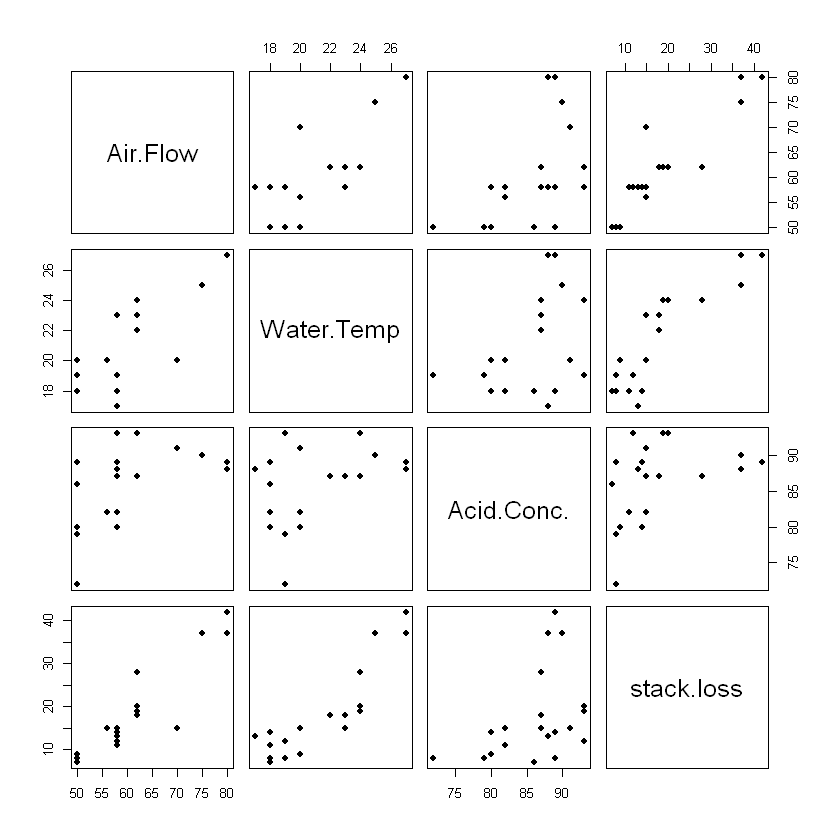

In [2]:
par(fin = c(10,10))
pairs(stackloss, pch = 19)

In [3]:
model <- lm(stack.loss ~ Air.Flow + Water.Temp + Acid.Conc., data = stackloss)
summary(model)


Call:
lm(formula = stack.loss ~ Air.Flow + Water.Temp + Acid.Conc., 
    data = stackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2377 -1.7117 -0.4551  2.3614  5.6978 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -39.9197    11.8960  -3.356  0.00375 ** 
Air.Flow      0.7156     0.1349   5.307  5.8e-05 ***
Water.Temp    1.2953     0.3680   3.520  0.00263 ** 
Acid.Conc.   -0.1521     0.1563  -0.973  0.34405    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.243 on 17 degrees of freedom
Multiple R-squared:  0.9136,	Adjusted R-squared:  0.8983 
F-statistic:  59.9 on 3 and 17 DF,  p-value: 3.016e-09


In [4]:
confint(model, level = 0.9)

,5 %,95 %
(Intercept),-60.6140306,-19.2253183
Air.Flow,0.4810400,0.9502404
Water.Temp,0.6550686,1.9355036
Acid.Conc.,-0.4240127,0.1197676


In [5]:
predict(model, newdata = data.frame(Air.Flow = 58, Water.Temp = 20, Acid.Conc.=86), interval = "prediction", level = 0.99)

,fit,lwr,upr
1,14.41064,4.759959,24.06133


In [6]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Air.Flow,1,1750.121989,1750.121989,166.3707443,3.308729e-10
Water.Temp,1,130.320772,130.320772,12.3886015,2.629043e-03
Acid.Conc.,1,9.965372,9.965372,0.9473319,3.440461e-01
Residuals,17,178.829962,10.519410,NA,NA


## Multicollinearity

Recall the optimal estimation

$$\hat{\beta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}$$

If $(\mathbf{X}^T\mathbf{X})^{-1}$ is not invertible, we may not be able to get $\hat{\beta}$, and the variance $(\mathbf{X}^T\mathbf{X})^{-1}\sigma^2$ will blow up.

Let $\mathbf{G}=\mathbf{X}^T\mathbf{X}$, it is easy to show that

1.$\mathbf{G}$ is $(p+1)\times(p+1)$.

2.$\mathbf{G}$ is symmetric.

3.$\mathbf{G}$ is positive semi-definite, i.e. $\mathbf{a}^T\mathbf{G}\mathbf{a}\geq 0$.

If there is the phenomena of multicollinearity, $\exists \mathbf{a}:\mathbf{X}\mathbf{a}=\mathbf{0}$.Then $\mathbf{a}^T\mathbf{G}\mathbf{a}=\mathbf{0}$ holds for some $\mathbf{a}$.

According to the eigen-decomposition

$$\mathbf{0}=\mathbf{a}^T\mathbf{G}\mathbf{a}=\mathbf{a}^T\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^T\mathbf{a}=\sum_j\lambda_j(\mathbf{a}^T\mathbf{q}_j)^2$$

For that $(\mathbf{a}^T\mathbf{q}_j)^2$ could not be zero simultaneously. Then we conclude that at least one eigenvalue of $\mathbf{G}$ is zero. Therefore we can examine if multicollinearity happens by eigen-decomposition.

In order to solve the singular problem, we introduce **Ridge Regression**

$$MSE(\beta)=\frac{1}{n}(\mathbf{Y}-\mathbf{X}\beta)^T(\mathbf{Y}-\mathbf{X}\beta)+\frac{\lambda}{n}\|\beta\|^2$$

And

$$\nabla_{\beta}MSE(\beta)=\nabla_{\beta}\big(\frac{1}{n}(\mathbf{Y}-\mathbf{X}\beta)^T(\mathbf{Y}-\mathbf{X}\beta)+\frac{\lambda}{n}\beta^T\beta\big)=\frac{2}{n}(-\mathbf{X}^T\mathbf{Y}+\mathbf{X}^T\mathbf{X}\beta+\lambda\beta)$$

$$\hat{\beta}_\lambda=(\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{Y}$$

This estimator is biased...

$$\mathbb{E}[\hat{\beta}_\lambda]=(\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbb{E}[\mathbf{Y}]=(\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{X}\beta$$

$$\mathbb{V}[\hat{\beta}_\lambda]=\mathbb{V}\big[(\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})^{-1}\mathbf{X}^T\epsilon\big]=\sigma^2(\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{X}(\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})^{-1}$$

## $F$-test for Multiple Coefficients

Let $S\subset\{1,2,\dots,p\}$ be the number of null model, and define the full model be the model using all $p$ covariant. We can show that $\hat{\sigma}_{null}^2\geq \hat{\sigma}_{full}^2$ always holds. Then we have below null hypothesis

$$H_0:\beta_j=0,j\in S$$

We have shown that under normal assumption

$$\frac{n\hat{\sigma}_{full}^2}{\sigma^2}\sim\chi_{n-p-1}^2$$

$$\frac{n\hat{\sigma}_{null}^2}{\sigma^2}\sim\chi_{s}^2$$

where $s$ is the number of variables in null model, from the property $\chi^2(\mu)+\chi^2(\nu)=\chi^2(\mu+\nu)$. Therefore,

$$\frac{n(\hat{\sigma}_{null}^2-\hat{\sigma}_{full}^2)}{\sigma^2}\sim\chi_{p-s}^2$$

And define the $F$-statistics

$$F=\frac{(\hat{\sigma}_{null}^2-\hat{\sigma}_{full}^2)\big/(p-s)}{\hat{\sigma}_{full}^2\big/(n-p-1)}\sim F_{p-s,n-p-1}$$

Then we reject the null hypothesis when

$$F>F_{p-s,n-p-1}(\alpha)$$

In particularly, if the null model is $Y=\beta_0+\epsilon$, our $F=\frac{(\hat{\sigma}_{null}^2-\hat{\sigma}_{full}^2)/p}{\hat{\sigma}_{full}^2/(n-p-1)}\sim F_{p,n-p-1}$

Note: $F$-test does not test any of the following:

1.Whether some variable ought to be included in the model.

2.Whether the relationship between $Y$ and $X_i$ is linear.

3.Whether any the assumptions hold.


Alternatively, we can use confidence ellipsoids, where

$$(\hat{\beta_S}-\beta_S)^T\Sigma_S^{-1}(\hat{\beta_S}-\beta_S)\sim\chi_s^2$$

and the $1-\alpha$ confidence ellipsoid for $\beta_S$ is

$$C=\big\{\beta_S:(\hat{\beta_S}-\beta_S)^T\Sigma_S^{-1}(\hat{\beta_S}-\beta_S)\leq c_\alpha\big\}$$

## Outliers and Influential Points

An **outlier** is a point with a large residual. An **influential point** is a point that has a large impact on the regression. They are totally different things.

Define the standardized residual

$$r_i=\frac{e_i}{\hat{\sigma}\sqrt{1-h_{ii}}}$$

where $h_{ii}=\mathbf{H}_{ii}$, and $h_{ii}$, which is called **leverage**, is the contribution of $i$-th data to $\hat{Y}_i$.

To get a better idea of how influential the $i$-th point is, we can fit other model omit this observation. Let $\mathbf{Y}^{(-i)}$ be the vector if fitted values when we remove data $i$. The **Cook's distance** is defined by:

$$D_i=\frac{(\mathbf{Y}-\mathbf{Y}^{(-i)})^T(\mathbf{Y}-\mathbf{Y}^{(-i)})}{(p+1)\hat{\sigma}^2}=\frac{r_i^2h_{ii}}{(p+1)(1-h_{ii})}$$

Therefore, the influence of a point is determined by both its residual and its leverage. Often when $D_i>1$ we regard $i$ as an influential point.

Detect outliers:

1.We can look at the leverage, which depends only on the predictors.

2.Look at the standardized residuals by how far they are from the regression line.

3.Look at the Cook's distance, which say the influence on regression when remove the point.

We must be careful when we encounter outliers, they may come from some patterns or caused by noise. We can delete the absurd point by some scientific criteria, or change our model carefully. Another method is called **robust regression**. Usually the robust estimation is based on minimizing a function of the form

$$\hat{\beta}=\arg\min_\beta\frac{1}{n}\sum_{i=1}^n\rho(y_i-\mathbf{x}_i^T\beta)$$

The loss function, say $\rho(\cdot)$, is varied. $\rho(u)=\big|u\big|$ is the least absolute deviation, and $\rho(u)=u^2$ is the OLS. A popular compromise  is the **Huber's loss**

$$
\rho(u)=\Big\{
\begin{align*}
& u^2, \big|u\big|\leq c\\
& 2c\big|u\big|, \big|u\big|\geq c\\
\end{align*}
$$

However, robust regression is aimed at the linear pattern with large noise, it can not solve non-linearity or correlated noise etc.

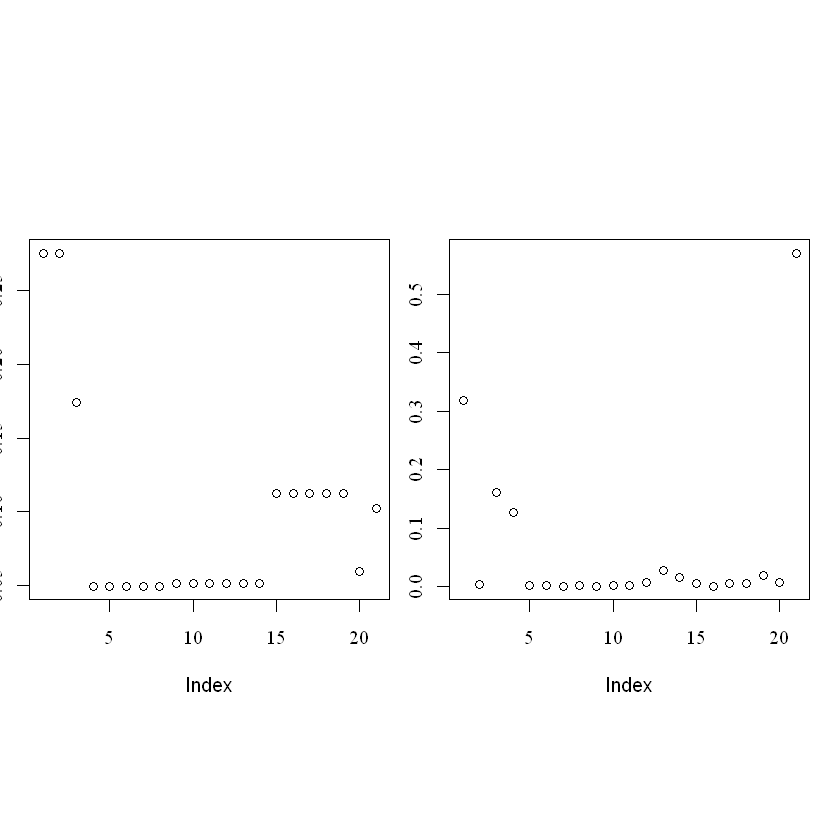

In [7]:
data(stackloss)
model <- lm(stack.loss ~ Air.Flow, data = stackloss)
leverage = hatvalues(model)
c_statistics = cooks.distance(model)
par(mfrow = c(1, 2), pin = c(4, 4))
plot(leverage, ylab = "leverage", font = 6)
plot(c_statistics, ylab = "Cook's distance", font = 6)

## Model Selection

Suppose we have multiple models, how to evaluate them? An obvious conclusion is the lower the generalization error is, the better the model. And it is natural to replace it with in-sample $MSE$. Unfortunately, the training error is always smaller than the generalization error. Consider predicting the new data at the same point $X_i$,

We have training model

$$\mathbf{Y}=\mathbf{X}\beta+\epsilon$$

and the in-sample error is

$$\frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y}_i)^2$$

the test model

$$\mathbf{Y}'=\mathbf{X}\beta+\epsilon'$$

and the test error

$$\frac{1}{n}\sum_{i=1}^n(Y'_i-\hat{Y}_i)^2$$

\begin{theorem}

The training error is always smaller than the generalization error.

$$\mathbb{E}\big[\frac{1}{n}\sum_{i=1}^n(Y'_i-\hat{Y}_i)^2\big]=\mathbb{E}\big[\frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y}_i)^2\big]+\frac{2(p+1)}{n}\sigma^2$$

\end{theorem}

\begin{proof}


\begin{align*}
\mathbb{E}\big[(Y_i-\hat{Y}_i)^2\big]&=\mathbb{V}\big[Y_i-\hat{Y}_i\big]+\Big(\mathbb{E}\big[Y_i-\hat{Y}_i\big]\Big)^2\\
&=\mathbb{V}[Y_i]+\mathbb{V}\big[\hat{Y}_i\big] - 2\text{Cov}\big[Y_i,\hat{Y}_i\big]+\Big(\mathbb{E}[Y_i]-\mathbb{E}\big[\hat{Y}_i\big]\Big)^2
\end{align*}

\begin{align*}
\mathbb{E}\big[(Y'_i-\hat{Y}_i)^2\big]&=\mathbb{V}\big[Y'_i-\hat{Y}_i\big]+\Big(\mathbb{E}\big[Y'_i-\hat{Y}_i\big]\Big)^2\\
&=\mathbb{V}[Y'_i]+\mathbb{V}\big[\hat{Y}_i\big] - 2\text{Cov}\big[Y'_i,\hat{Y}_i\big]+\Big(\mathbb{E}[Y'_i]-\mathbb{E}\big[\hat{Y}_i\big]\Big)^2
\end{align*}

It is easy to see that $\mathbb{E}[Y'_i]=\mathbb{E}[Y_i]$, $\mathbb{V}[Y'_i]=\mathbb{V}[Y_i]$ and $\text{Cov}\big[Y'_i,\hat{Y}_i\big]=0$.

Therefore

$$\mathbb{E}\big[(Y'_i-\hat{Y}_i)^2\big]=\mathbb{E}\big[(Y_i-\hat{Y}_i)^2\big] + 2\text{Cov}\big[Y_i,\hat{Y}_i\big]$$

Then take expectation

\begin{align*}
\mathbb{E}\big[\frac{1}{n}\sum_{i=1}^n(Y'_i-\hat{Y}_i)^2\big]&=\mathbb{E}\big[\frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y}_i)^2\big]+\frac{2}{n}\sum_{i=1}^n\text{Cov}\big[Y_i,\hat{Y}_i\big]\\
&=\mathbb{E}\big[\frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y}_i)^2\big]+\frac{2}{n}\sum_{i=1}^n\sigma^2h_{ii}\\
&=\mathbb{E}\big[\frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y}_i)^2\big]+\frac{2}{n}\sigma^2(p+1)
\end{align*}
\end{proof}

The term $\frac{2(p+1)}{n}\sigma^2$ is called the **optimism** of the model. One can see it agrees on the learning theory

1.More noise gives the model more opportunities to seem to fit well.

2.More data makes it harder to pretend the fit is better than it really is.

3.Growing $p$ makes it easy to fit noise, in other words, if adding a parameter does not reduce more a fixed amount of $MSE$, it should not be added.

Therefore, the **Mallows $C_p$** statistic using debiased quantity

$$C_p=\frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y}_i)^2+\frac{2\hat{\sigma}^2}{n}(p+1)=MSE+\text{penalty} $$

For model selection, we use

$$\Delta C_p= MSE_1-MSE_2+\frac{2\hat{\sigma}^2}{n}(p_1-p_2)$$

Let $\hat{Y}_i^{(-i)}$ be the predicted value when we leave out point $(X_i,Y_i)$. Define the **leave-one-out-cross-validation score** as

$$LOOCV\equiv\frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y}_i^{(-i)})^2=\frac{1}{n}\sum_{i=1}^n\big(\frac{Y_i-\hat{Y}_i}{1-\mathbf{H}_{ii}}\big)^2$$

The average of $\mathbf{H}_{ii}$ is $\gamma=\frac{p+1}{n}$, here we use $\gamma$ to approximate $\mathbf{H}_{ii}$. Then

\begin{align*}
LOOCV&\approx \frac{1}{n}\sum_{i=1}^n\big(\frac{Y_i-\hat{Y}_i}{1-\gamma}\big)^2\\
&\approx\frac{1+2\gamma}{n}\sum_{i=1}^n(Y_i-\hat{Y}_i)^2\\
&=\frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y}_i)^2+\frac{2\gamma}{n}\sum_{i=1}^n(Y_i-\hat{Y}_i)^2\\
&=MSE+\frac{2\hat{\sigma}^2}{n}(p+1)
\end{align*}

Note that we use the Taylor series $(1+\gamma)^{-2}\approx 1+2\gamma$. Therefore leave-one-out-cross-validation score is also a estimation of population error!

$LOOCV$ or cross-validation estimator is the most popular tool to do model selection, for that it can estimate generalization error.

Here we will introduce $AIC$, it estimates the error by subtract the number of parameters. Suppose the true parameter is $\theta^*$, define the number of dimensions of parameter space $d\equiv\text{dim}(\Theta)$. And the MLE of $\theta$ is $\hat{\theta}$. Then

$$\nabla\mathcal{L}(\hat{\theta})=0$$

where $\mathcal{L}(\theta)$ is the log-likelihood under the sample. Do a Taylor series expansion of $\nabla\mathcal{L}(\theta)$ around $\theta^*$:

$$\nabla\mathcal{L}(\theta)=\nabla\mathcal{L}(\theta^*)+(\theta-\theta^*)^T\nabla\nabla\mathcal{L}(\theta^*)$$

Denote the Hessian matrix $\mathbf{K}$

$$\mathbf{0}=\nabla\mathcal{L}(\theta^*)+(\theta-\theta^*)\mathbf{K}$$

The expected log-likelihood of $\hat{\theta}$ is given by

$$\ell(\theta)\approx\ell(\theta^*)+(\theta-\theta^*)\nabla\ell(\theta^*)+\frac{1}{2}(\theta-\theta^*)^T\nabla\nabla\ell(\theta^*)(\theta-\theta^*)$$

where $\ell(\theta)=\mathbb{E}_{\text{Data}}[\mathcal{L}(\theta)]$

From parametric inference we know $\mathbb{E}[\nabla\mathcal{L}(\theta^*)]=0$,

$$\ell(\theta)\approx\ell(\theta^*)+\frac{1}{2}(\theta-\theta^*)^T\mathbf{k}(\theta-\theta^*)$$

where $\mathbf{k}$ is the Hessian matrix.

Apply this to the MLE

$$\ell(\hat{\theta})\approx\ell(\theta^*)+\frac{1}{2}\nabla\mathcal{L}(\theta^*)\mathbf{K}^{-1}\mathbf{k}\mathbf{K}^{-1}\nabla\mathcal{L}(\theta^*)$$

Taking expectations,

$$\mathbb{E}\big[\ell(\hat{\theta})\big]\approx\ell(\theta^*)+\frac{1}{2}\text{tr}(\mathbf{K}^{-1}\mathbf{k}\mathbf{K}^{-1}\mathbf{J})$$

where $\mathbf{J}$ is the **Fisher Information matrix**, i.e the variance of score function. From the Law of Large Numbers, $\forall\theta,\mathbb{E}[\mathcal{L}(\theta)]\stackrel{P}\rightarrow\ell(\theta)$. Adding the continuous mapping theorem, we have $\nabla\nabla\mathcal{L}(\theta^*)=\mathbf{K}\stackrel{P}\rightarrow\mathbf{k}=\nabla\nabla\ell(\theta^*)$.

$$\mathbb{E}\big[\ell(\hat{\theta})\big]\approx\ell(\theta^*)+\frac{1}{2}\text{tr}(\mathbf{K}^{-1}\mathbf{J})$$

How to deal with the unknown $\ell(\theta^*)$? Another Taylor expansion

$$\mathcal{L}(\theta^*)\approx\mathcal{L}(\hat{\theta}) +\frac{1}{2}(\theta^*-\hat{\theta})^T\nabla\nabla\mathcal{L}(\hat{\theta})(\theta^*-\hat{\theta})$$

Plug into the MLE

$$\mathcal{L}(\theta^*)\approx\mathcal{L}(\hat{\theta}) +\frac{1}{2}(\mathbf{K}^{-1}\nabla\mathcal{L}(\theta^*))^T\nabla\nabla\mathcal{L}(\hat{\theta})(\mathbf{K}^{-1}\nabla\mathcal{L}(\theta^*))$$

For $\hat{\theta}\stackrel{P}\rightarrow\theta^*$, according to continuous mapping theorem we have $$\nabla\nabla\mathcal{L}(\hat{\theta})\stackrel{P}\rightarrow\nabla\nabla\mathcal{L}(\theta^*)$$

Then

$$\mathcal{L}(\theta^*)\approx\mathcal{L}(\hat{\theta}) +\frac{1}{2}\text{tr}(\mathbf{k}^{-1}\mathbf{J}) $$

Take expectations,

$$\ell(\theta^*)=\mathbb{E}[\mathcal{L}(\hat{\theta})]+\frac{1}{2}\text{tr}(\mathbf{k}^{-1}\mathbf{J})$$

Therefore

$$\ell(\hat{\theta})\approx\ell(\theta^*)+\frac{1}{2}\text{tr}(\mathbf{k}^{-1}\mathbf{J})=\mathbb{E}[\mathcal{L}(\hat{\theta})]+\text{tr}(\mathbf{k}^{-1}\mathbf{J})$$

And it is known that under regularity condition, we have

$$\mathbf{J}=-\mathbb{E}[\mathbf{K}]=-\mathbf{k}$$

Then 

$$\ell(\hat{\theta})\approx\mathbb{E}[\mathcal{L}(\hat{\theta})]-\text{tr}[\mathbf{I}_{d\times d}] =\mathbb{E}[\mathcal{L}(\hat{\theta})]-d$$

The unbiased estimator is

$$AIC=\mathcal{L}(\hat{\theta})-d$$

In order to select linear Gaussian model, it is easy to show that

$$\frac{2\hat{\sigma}^2}{n}\Delta AIC \approx \Delta MSE+\frac{2}{n}\hat{\sigma}^2(p_1-p_2)=C_p$$

It is also the approximation of the population error.

The last criterion is $BIC$,

$$BIC=\mathcal{L}(\hat{\theta})-\frac{\log{n}}{2}d$$

In fact, $BIC$ is trying to maximize $\mathbb{P}(\mathcal{M}_j\mid\text{Data})\propto p(\text{Data}\mid\mathcal{M}_j)p_j$.

It is shown that $BIC$ tends to choose simpler model. Note that $BIC$ assumes that one of the models is true and we are trying to find the model most likely to be true in the Bayesian scenario. Instead, $AIC$ and $LOOCV$ try to find the model predicting best.

## Heteroskedasticity and Weighted Least Squares

In reality, we may encounter the prediction accuracy requirement where the point is influenced more by its neighbors or the heteroskedasticity.

Here we consider the linear model

1.$\mathbf{Y}=\mathbf{X}\beta+\epsilon$

2.$\mathbb{E}[\epsilon_i\mid x_i]=0$ and $\mathbb{V}[\epsilon_i\mid x_i]=\sigma^2_i$, or $\mathbb{V}[\epsilon\mid \mathbf{X}]=\Sigma$.

3.$\epsilon$ are independent across observations.

We use the **Weighted Least Squares estimator** $K$ which minimize the weighted $MSE$ to estimate $\beta$.

$$WMSE=\frac{1}{n}\sum_{i=1}w_i(Y_i-\mathbf{X}_i\beta)^2$$

Where $K=(\mathbf{X}^T\mathbf{W}\mathbf{X})^{-1}\mathbf{X}^T\mathbf{W}$. Then

$$\mathbb{E}[\hat{\beta}]=\beta$$

$$\mathbb{V}[\hat{\beta}]=K\Sigma K^T=(\mathbf{X}^T\Sigma^{-1}\mathbf{X})^{-1}$$.

Therefore, $\hat{\beta}=K\mathbf{Y}$ is the unbiased estimator of $\beta$.

\begin{theorem}[Gauss-Markov]

$\hat{\beta}=(\mathbf{X}^T\mathbf{W}\mathbf{X})^{-1}\mathbf{X}^T\mathbf{W}\mathbf{Y}$ is the best linear unbiased estimator of $\beta$.

In other words, for all linear unbiased estimators $\tilde{\beta}$.
$$\mathbb{V}[\tilde{\beta}]\geq \mathbb{V}[\hat{\beta}]$$

\end{theorem}


\begin{proof}

Let $\tilde{\beta}=\mathbf{QY}$ be any linear unbiased estimator. Then

$$\mathbb{E}[\mathbf{QY}]=\mathbf{QX}\beta$$

$\mathbf{QX}$ has to be $\mathbf{I}$.

Then $\mathbb{V}[\mathbf{QY}\mid \mathbf{X}]=\mathbf{Q}\Sigma\mathbf{Q}^T$.

Let $K\equiv (\mathbf{X}^T\Sigma^{-1}\mathbf{X})^{-1}\mathbf{X}^T\Sigma^{-1}$. Whatever $\mathbf{Q}$ might be, we can find a matrix $\mathbf{R}$ that

$$\mathbf{Q}=K+\mathbf{R}$$

And from $K\mathbf{X}=\mathbf{I}$, we have $\mathbf{RX}=\mathbf{0}$.

\begin{align*}
\mathbb{V}[\tilde{\beta}]&=(K+\mathbf{R})\Sigma(K+\mathbf{R})^T\\
&=K\Sigma K+\mathbf{R}\Sigma K^T +K\Sigma\mathbf{R}^T+ \mathbf{R}\Sigma\mathbf{R}^T\\
&=(\mathbf{X}^T\Sigma^{-1}\mathbf{X})^{-1}+\mathbf{R}\Sigma\mathbf{R}^T\\
&=\mathbb{V}[\hat{\beta}]+\mathbf{R}\Sigma\mathbf{R}^T
\end{align*}

The last term is positive definate, hence

$$\mathbb{V}[\tilde{\beta}]\geq \mathbb{V}[\hat{\beta}]$$

\end{proof}

Note that

1.If all the noise variances are equal, we obtain the optimality of OLS.

2.The theorem does not rule out the linear biased estimators with smaller variance or non-linear biased estimators of even smaller variance.

If we do not know the variances, there are two common ways to estimate conditional variances.

Method 1:

1.Estimate $m(x)$ with a regression model $\hat{m}(x)$.

2.Construct the squared residuals $u_i=(Y_i-\hat{m}(x_i))^2$.

3.Use any non-parametric method to estimate the conditional mean of $u_i$, denote $\hat{q}(x)$.

4.Estimate the variance using $\hat{\sigma}^2_x=\hat{q}(x)$.

Method 2:

1.Estimate $m(x)$ with a regression model $\hat{m}(x)$.

2.Construct log squared residuals $z_i=\log{(Y_i-\hat{m}(x_i))^2}$.

3.Use any non-parametric method to estimate the conditional mean of $z_i$, denote $\hat{s}(x)$.

4.Predict the variance using $\hat{\sigma}^2_x=e^{\hat{s}(x)}$

Method 2 ensures the estimated variances are positive!



In [8]:
x <- c(1:20)
eps <- c(1:20) 
eps[1:10] <- rnorm(mean = 0, sd = 1, n = 10)
eps[11:20] <- rnorm(mean = 0, sd = 4, n = 10)
beta_0 = 1.0
beta_1 = 2.0
y <- beta_0 + beta_1 * x + eps
y

[1]  3.961750  6.992881  7.534206  9.449619 12.011976 14.774443 15.240855
 [8] 18.062365 18.188989 20.745849 26.472593 22.366047 20.212402 33.028802
[15] 28.126261 36.436169 33.238802 33.439091 41.314987 40.650927

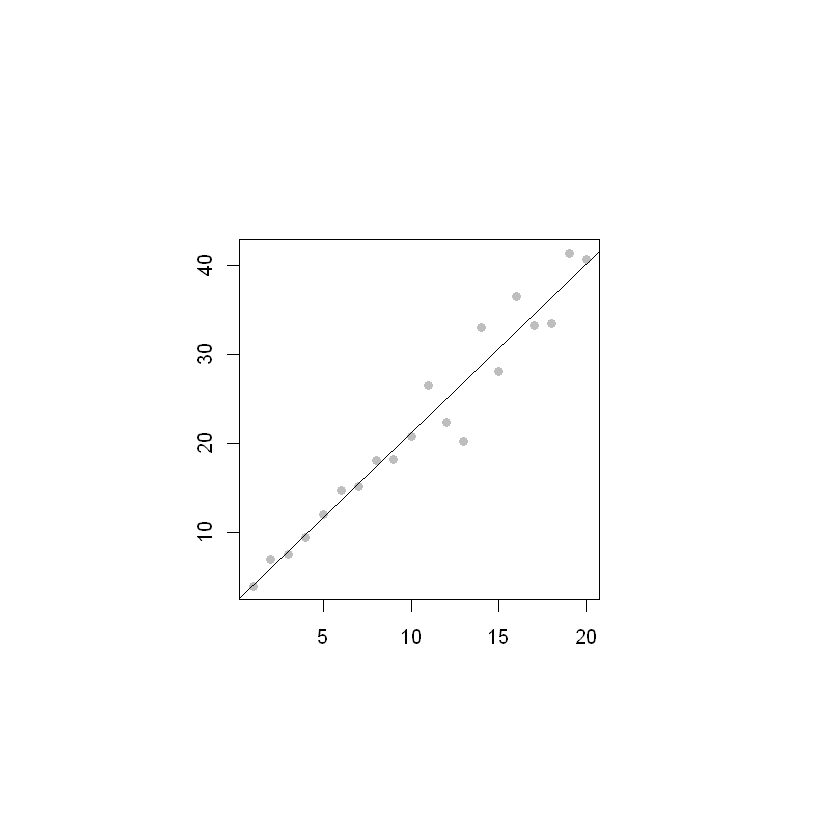

In [9]:
par(fin = c(3,3), pin = c(3 ,3))
plot(x, y, pch = 19, col = "gray")
out <- lm(y ~ x)
abline(out)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6383 -1.1087 -0.1916  1.0406  4.2828 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2117     1.2317   1.796   0.0894 .  
x             1.8953     0.1028  18.433 3.92e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.652 on 18 degrees of freedom
Multiple R-squared:  0.9497,	Adjusted R-squared:  0.9469 
F-statistic: 339.8 on 1 and 18 DF,  p-value: 3.921e-13


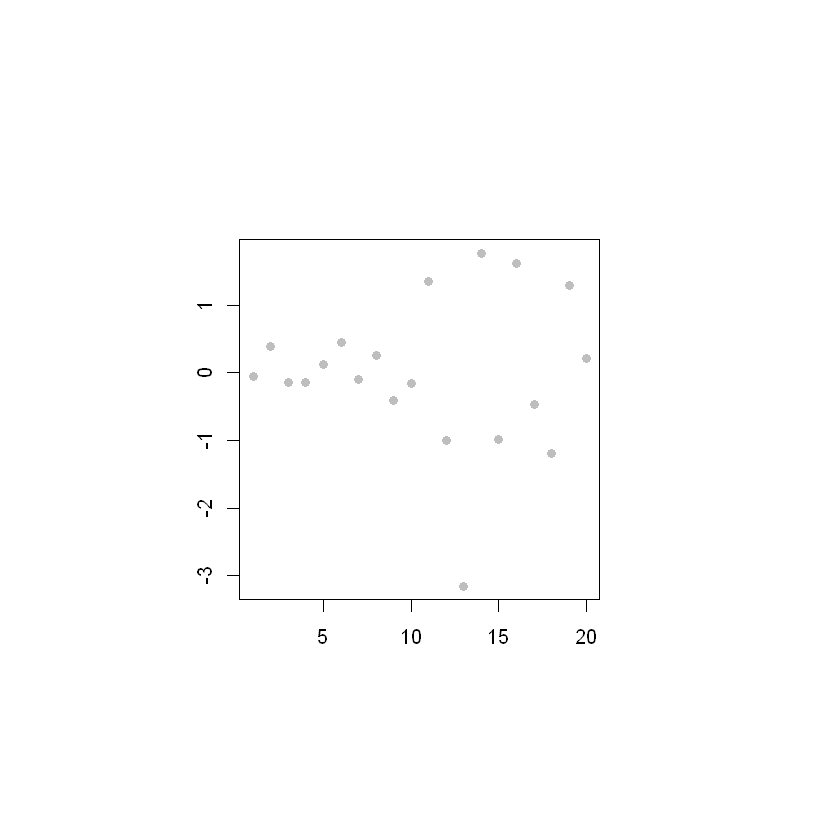

In [11]:
summary(out)
par(fin = c(3,3), pin = c(3 ,3))
plot(x, rstudent(out), pch = 19, col = "gray")

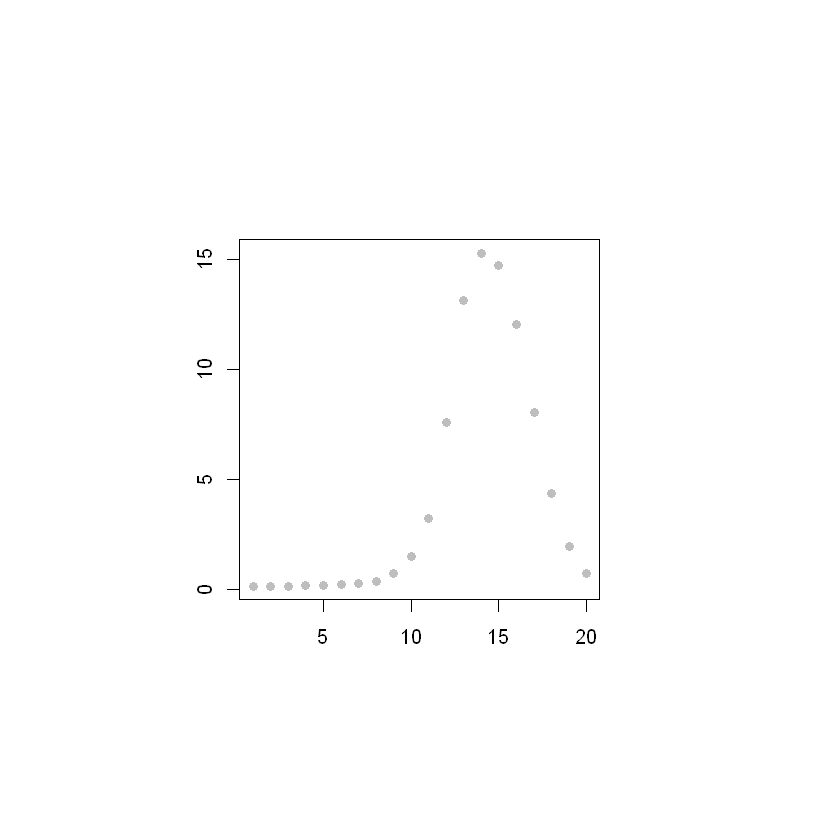

In [12]:
u = log((resid(out))^2)
tmp = loess(u ~ x)
s_2 = exp(tmp$fitted)
par(fin = c(3,3), pin = c(3 ,3))
plot(x, s_2, pch = 19, col = "gray")

In [13]:
w = 1/s_2
out_2 = lm(y ~ x, weights = w)
summary(out_2)


Call:
lm(formula = y ~ x, weights = w)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.9403 -1.1581 -0.6041  0.9872  2.5370 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.29940    0.29815   7.712 4.11e-07 ***
x            1.91926    0.04868  39.425  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.438 on 18 degrees of freedom
Multiple R-squared:  0.9886,	Adjusted R-squared:  0.9879 
F-statistic:  1554 on 1 and 18 DF,  p-value: < 2.2e-16


## Variable Selection

Let $\hat{m}(x)$ denote the estimated model and the true regression function is $m(x)$, if $\hat{m}(x)$ is the unbiased estimator of $m(x)$. However, generally it is not true because the model assumptions are wrong. And even if the true model is linear, we could also have bias because of the variable selection.

Define the prediction error of a testing observation

$$R\equiv \mathbb{E}(Y-m(X))^2=\mathbb{E}\big(Y-m(X)+m(X)-\mathbb{E}[\hat{m}(X)]+\mathbb{E}[\hat{m}(X)]-\hat{m}(X)\big)^2=\tau^2+B^2+V$$

where 

$$\tau^2=\mathbb{E}(Y-m(X))^2$$

$$B^2=\mathbb{E}\big[(\mathbb{E}[\hat{m}(X)]-m(X))^2\big]$$

$$V=\mathbb{E}\big[(\hat{m}(X)-\mathbb{E}[\hat{m}(X)])^2\big]$$

We call $\tau^2$ is the unavoidable error, it means even if we know the true model $m(X)$, we still make mistakes. And $B^2$ is the squared bias term, $V$, the variance.

From learning theory, small models have low variance and high bias. Large models have high variance and low bias.

A trivial thought to picking a variable under the assumption is using the $p$-value. But it is not a good method. Recall the $t$-test of coefficients

$$t=\frac{\hat{\beta_j}}{\hat{\text{se}}[\hat{\beta_j}]}=\frac{\hat{\beta_j}}{\frac{\hat{\sigma}}{\sqrt{ns_{X_i}}}\sqrt{VIF_i}}$$

Note that the defination of $VIF$ is the ratio between correlated predictors variance and uncorrelated predictors variance. Therefore

1.Larger coefficients will have larger test statistics and be more significant.

2.Reducing the noise around the regression line will increase **all** the test statistics.

3.Increasing the sample size will increase **all** the test statistics.

4.More variance in a predictor variable will increase the test statistics with others unchanged.

5.More correlation between $X_i$ and others will decrease the test statistics of $i$.

Therefore how to fit all the models? Here is the solution.

The preprocessing method is scaling the designed matrix and response.

And the **Forward Stepwise Regresion** is follwing

1.Start by fitting the simplest model $Y=\beta_0+\epsilon$. Let $S=\emptyset$.

2.Next consider all single variable models. Select the one with lowest $AIC$ or cross-validation error.

3.Adding another variable. Choose the best one adding to $S$.

4.Continue until can not add.

So we have model $\mathcal{M}_1,\mathcal{M}_2,\dots$, we need to choose the one with lowest prediction error.

Another approach is to use **lasso**, which minimize

$$(\mathbf{Y}-\mathbf{X}\beta)^T(\mathbf{Y}-\mathbf{X}\beta)+\lambda\|\beta\|_1$$

It turns out that the solution is sparse.

In [14]:
data(stackloss)
names(stackloss)

[1] "Air.Flow"   "Water.Temp" "Acid.Conc." "stack.loss"

In [15]:
small = lm(stack.loss ~ 1, data = stackloss)
big = lm(stack.loss ~ ., data = stackloss)
tmp = step(small, scope = list(lower = small, upper = big), direction = "forward")

Start:  AIC=98.4
stack.loss ~ 1

             Df Sum of Sq     RSS    AIC
+ Air.Flow    1    1750.1  319.12 61.142
+ Water.Temp  1    1586.1  483.15 69.852
+ Acid.Conc.  1     330.8 1738.44 96.741
<none>                    2069.24 98.399

Step:  AIC=61.14
stack.loss ~ Air.Flow

             Df Sum of Sq    RSS    AIC
+ Water.Temp  1   130.321 188.80 52.119
<none>                    319.12 61.142
+ Acid.Conc.  1     9.979 309.14 62.475

Step:  AIC=52.12
stack.loss ~ Air.Flow + Water.Temp

             Df Sum of Sq    RSS    AIC
<none>                    188.79 52.119
+ Acid.Conc.  1    9.9654 178.83 52.980


Warning message:
"package 'lars' was built under R version 3.4.1"Loaded lars 1.2



[1] 3


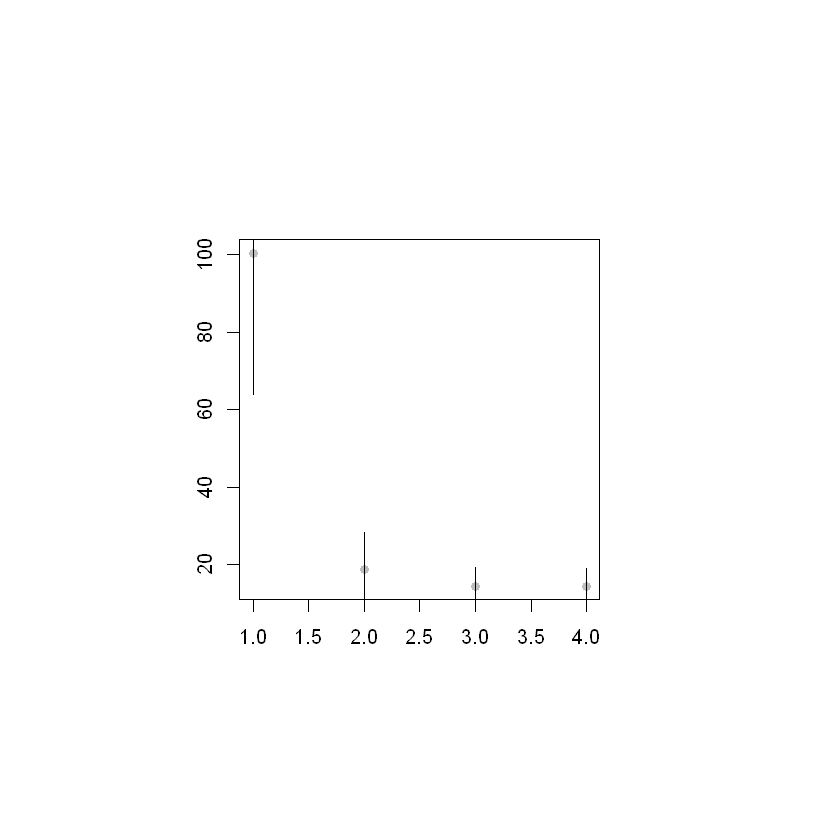

In [16]:
library(lars)
x <- as.matrix(stackloss[, 1:3])
y <- stack.loss
out = lars(x, y, type = "stepwise")
tmp = cv.lars(x, y, K = 10, type = "stepwise", plot.it = FALSE)
m = length(tmp$cv)
par(fin = c(3,3), pin = c(3 ,3))
plot(1:m, tmp$cv, pch = 19, col = "gray")
for (i in 1:m){
    segments(i, tmp$cv[i] - tmp$cv.error[i], i, tmp$cv[i] + tmp$cv.error[i])
}
j = which.min(tmp$cv)
print(j)

Warning message:
"package 'glmnet' was built under R version 3.4.2"Loading required package: Matrix
Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.4.2"Loaded glmnet 2.0-13



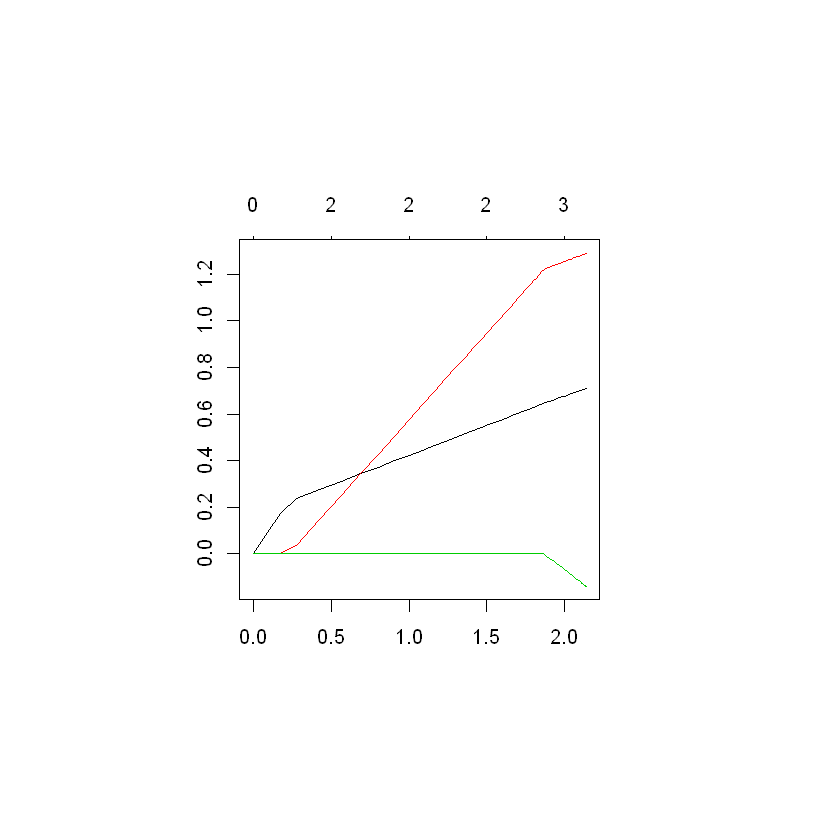

In [17]:
library(glmnet)
out = glmnet(x, y)
par(fin = c(3,3), pin = c(3 ,3))
plot(out)

Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"

[1] 0.04543538

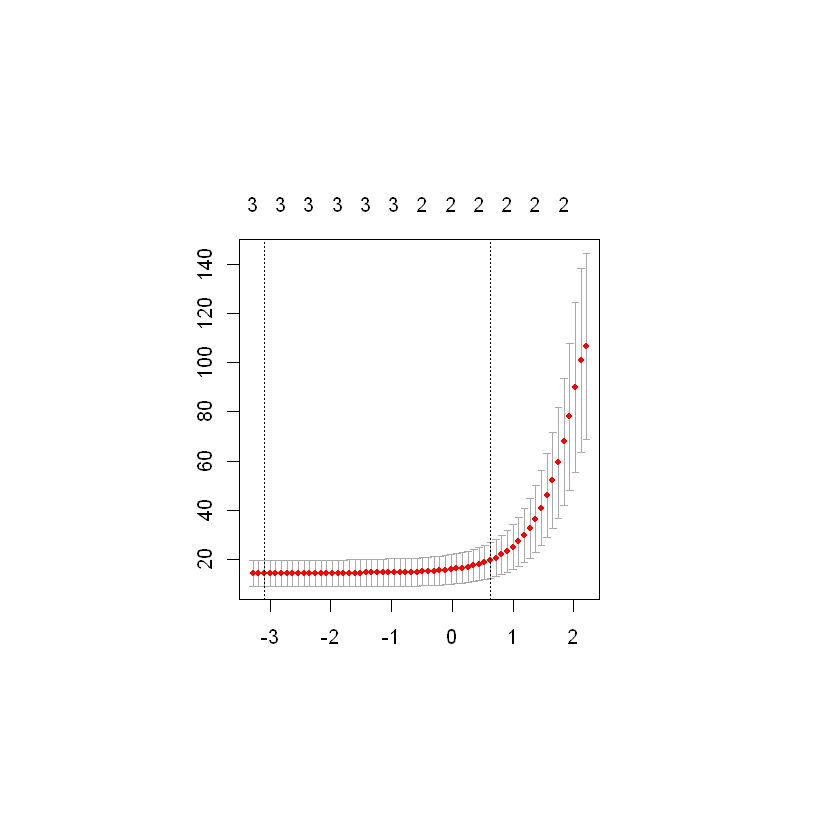

In [18]:
cvfit = cv.glmnet(x, y)
par(fin = c(3,3), pin = c(3 ,3))
plot(cvfit)
cvfit$lambda.min

In [19]:
coef(cvfit, s = "lambda.min")

4 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept) -40.7641798
Air.Flow      0.7078085
Water.Temp    1.2867835
Acid.Conc.   -0.1347717